## 예제 11-1. Prophet 모델 예시

### 1) 위키백과 페이지 조회수 데이터 모델화

#### Prophet 모델: 예측

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot ## conda(pip) install plotly prophet을 통해 설치 conda 환경에서는 필히 conda로 설치

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [8]:
pro = Prophet(changepoint_prior_scale=0.1)
pro.fit(df)

18:25:14 - cmdstanpy - INFO - Chain [1] start processing
18:25:15 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

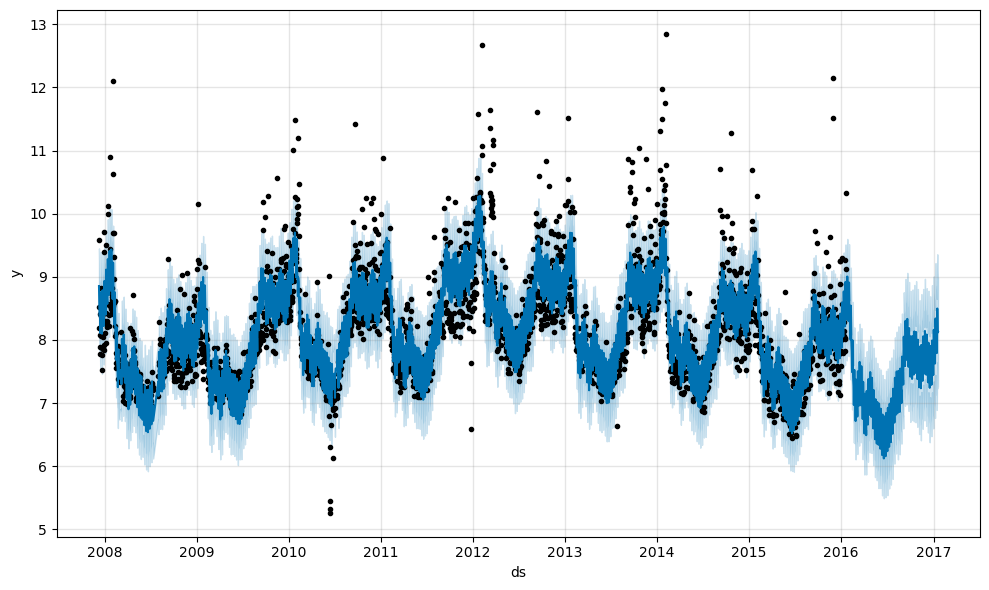

In [10]:
fig1 = pro.plot(forecast)

#### Prophet 모델: 분해

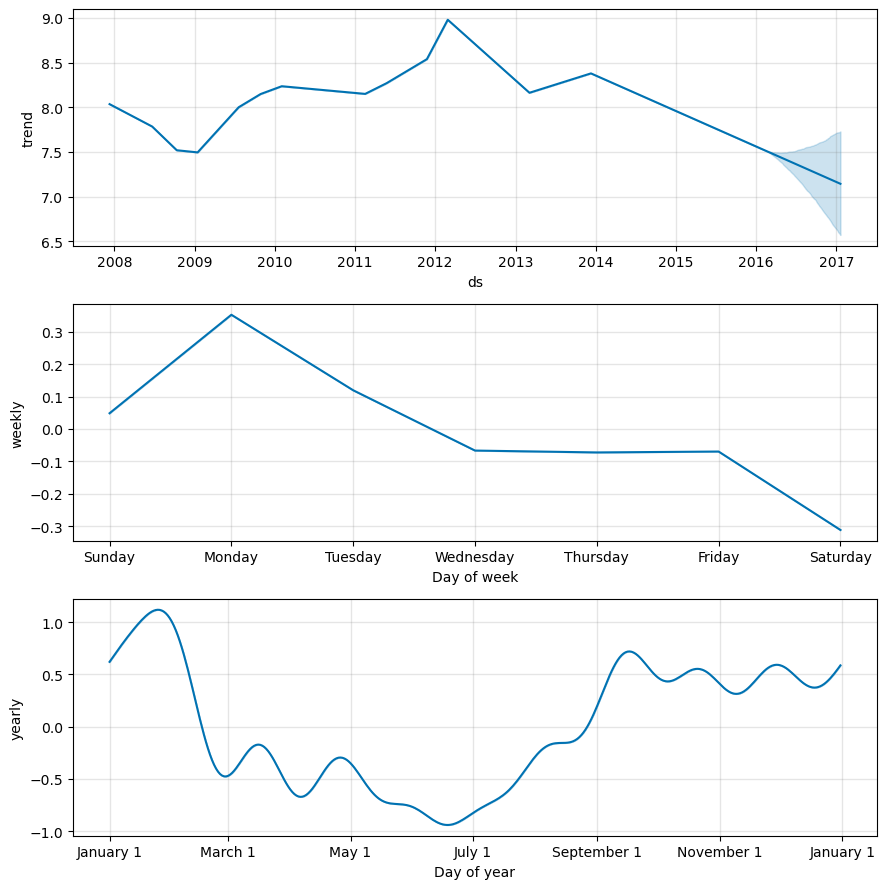

In [11]:
fig2 = pro.plot_components(forecast)

#### Prophet 모델: 추세

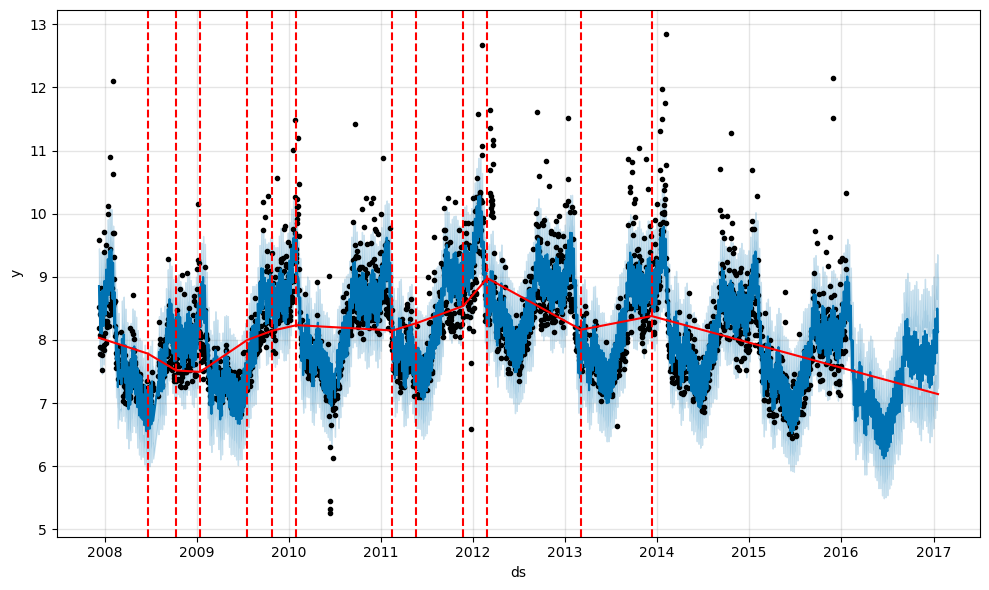

In [12]:
fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

18:27:54 - cmdstanpy - INFO - Chain [1] start processing
18:27:55 - cmdstanpy - INFO - Chain [1] done processing


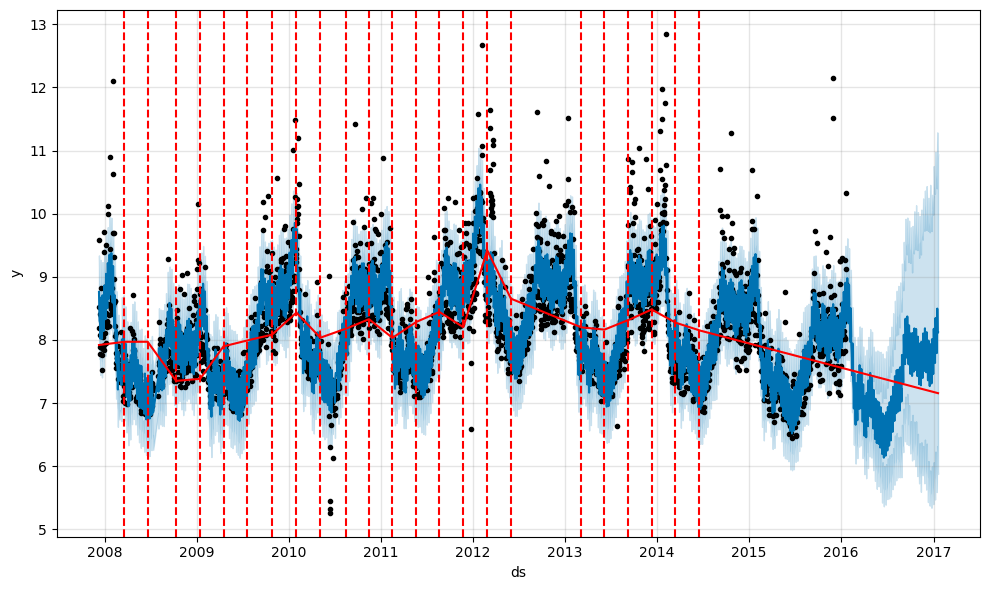

In [14]:
pro = Prophet(changepoint_prior_scale=0.5)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

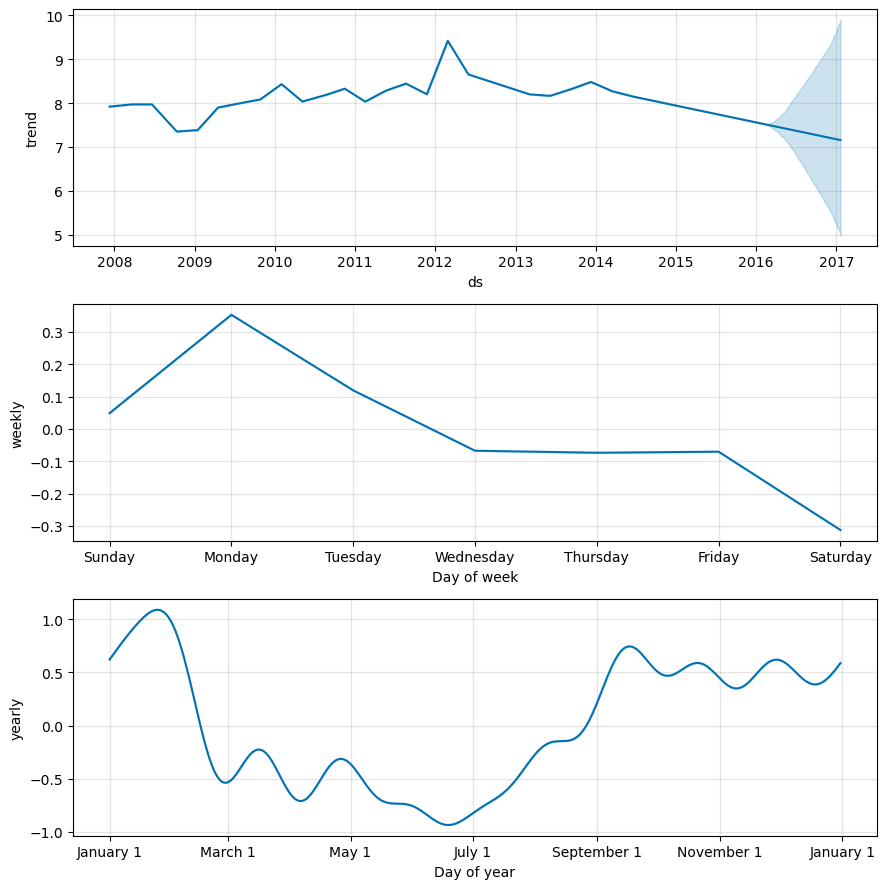

In [15]:
fig2 = pro.plot_components(forecast)

#### Prophet 모델: 연간 계절성

##### 모델 피팅, 분해 및 예측 시각화 (연간 계절성 10)

18:30:01 - cmdstanpy - INFO - Chain [1] start processing
18:30:02 - cmdstanpy - INFO - Chain [1] done processing


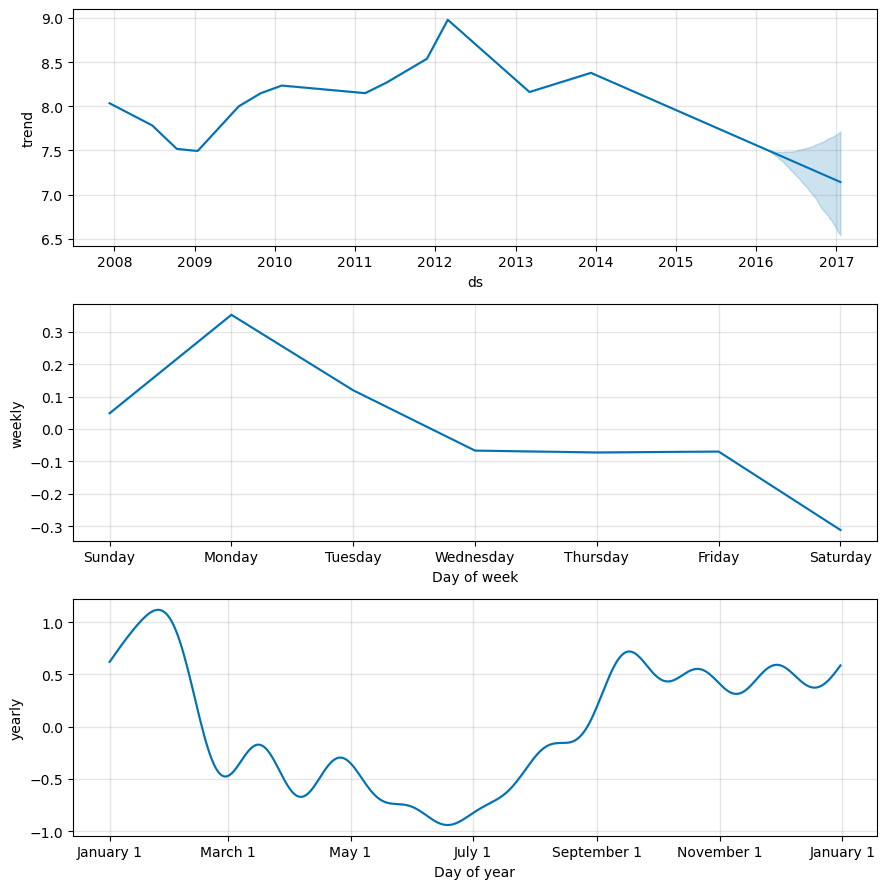

In [17]:
pro = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

##### 모델 피팅, 분해 및 예측 시각화 (연간 계절성 20)

18:30:22 - cmdstanpy - INFO - Chain [1] start processing
18:30:23 - cmdstanpy - INFO - Chain [1] done processing


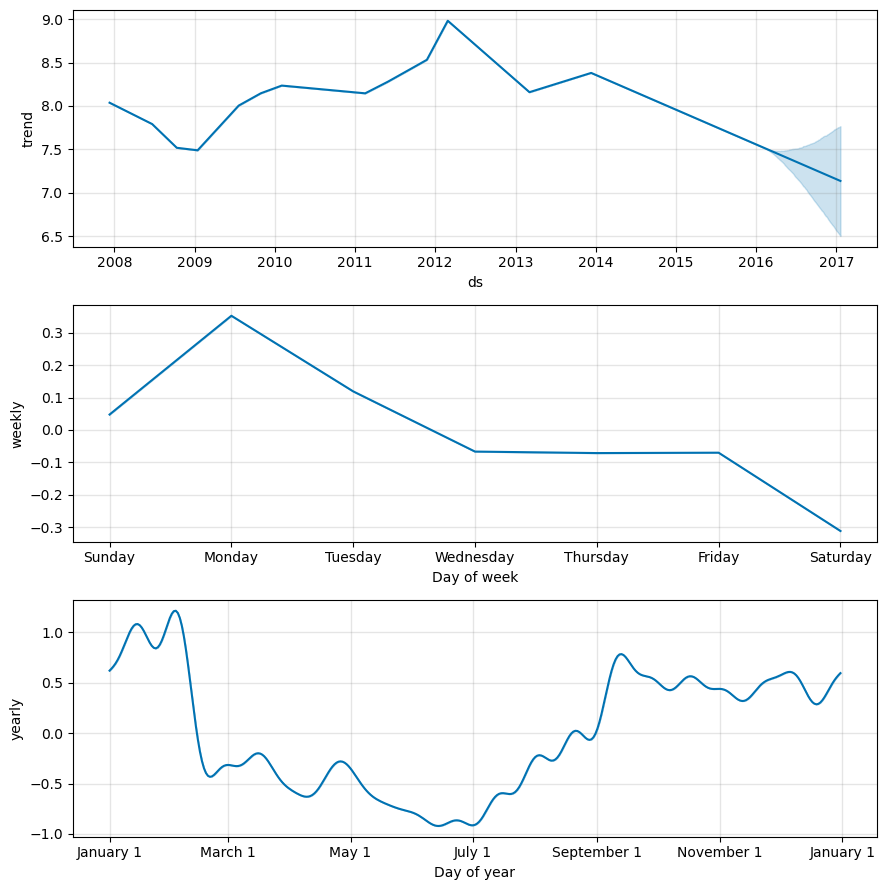

In [ ]:
pro2 = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=20,
    daily_seasonality=False
)
pro2.fit(df)

future2 = pro2.make_future_dataframe(periods=365)
forecast2 = pro2.predict(future2)

fig = pro2.plot_components(forecast2)

##### 예측 (연간 계절성 10)

18:30:58 - cmdstanpy - INFO - Chain [1] start processing
18:30:59 - cmdstanpy - INFO - Chain [1] done processing


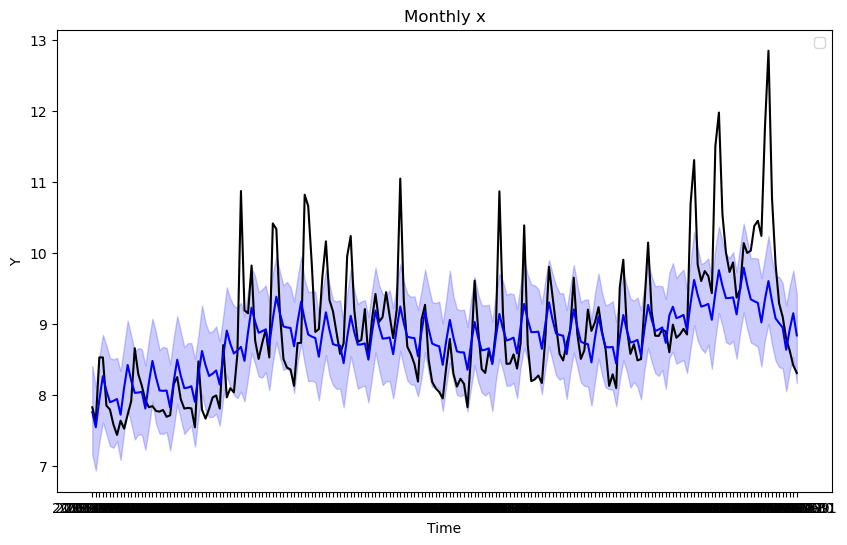

In [19]:
pro = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly x')
plt.legend()
plt.show()

#### Prophet 모델: 월간 계절성

18:31:27 - cmdstanpy - INFO - Chain [1] start processing
18:31:29 - cmdstanpy - INFO - Chain [1] done processing


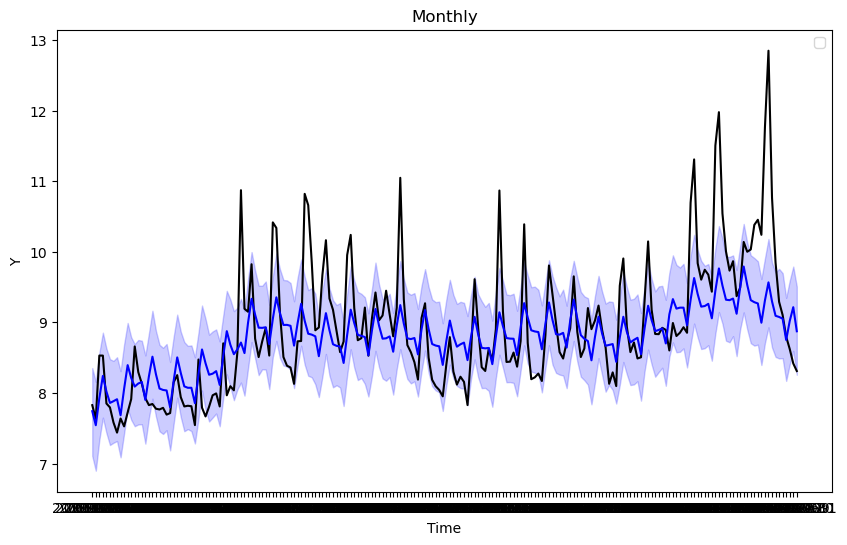

In [20]:
pro = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.add_seasonality(name='monthly', period=30.5, fourier_order=5)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly')
plt.legend()
plt.show()

#### Prophet 모델: 주간 계절성

18:32:33 - cmdstanpy - INFO - Chain [1] start processing
18:32:35 - cmdstanpy - INFO - Chain [1] done processing


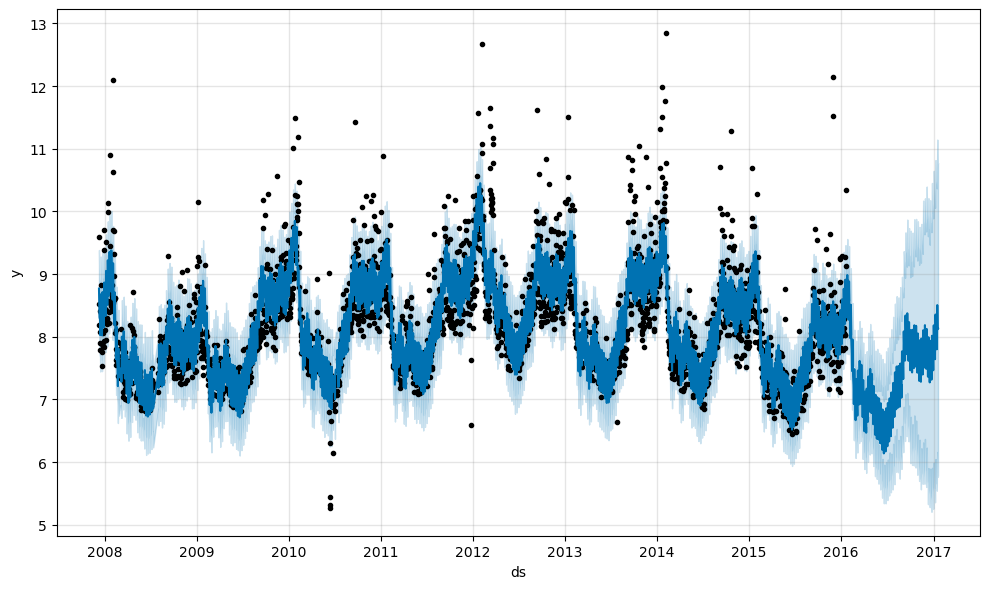

In [21]:
pro = Prophet(
    changepoint_prior_scale=0.5,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

#### Prophet 모델: 승산 모형

18:33:02 - cmdstanpy - INFO - Chain [1] start processing
18:33:05 - cmdstanpy - INFO - Chain [1] done processing


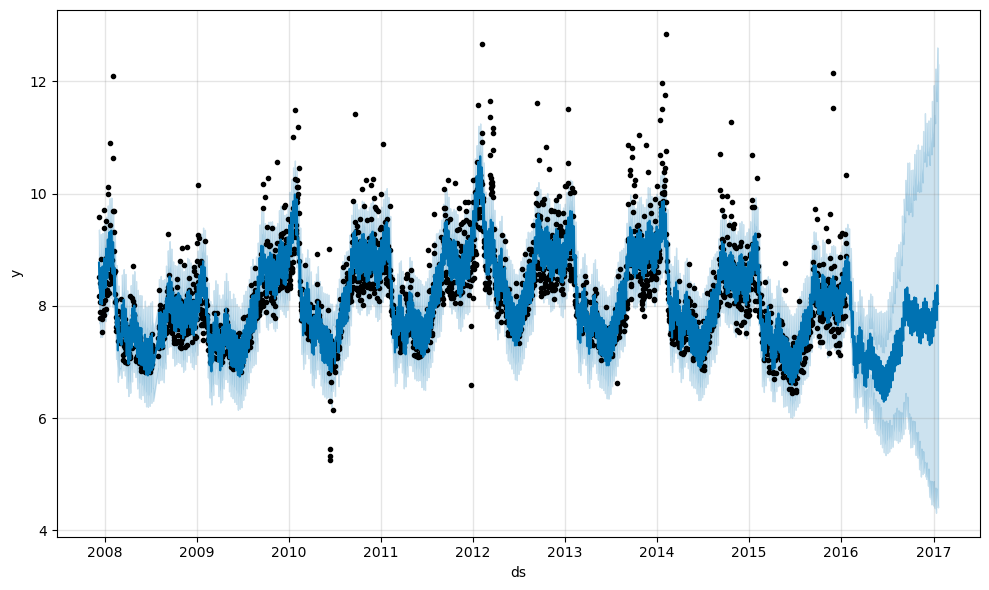

In [22]:
pro = Prophet(
    changepoint_prior_scale=0.5,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

#### Prophet 모델: 휴일 효과

18:34:02 - cmdstanpy - INFO - Chain [1] start processing
18:34:05 - cmdstanpy - INFO - Chain [1] done processing


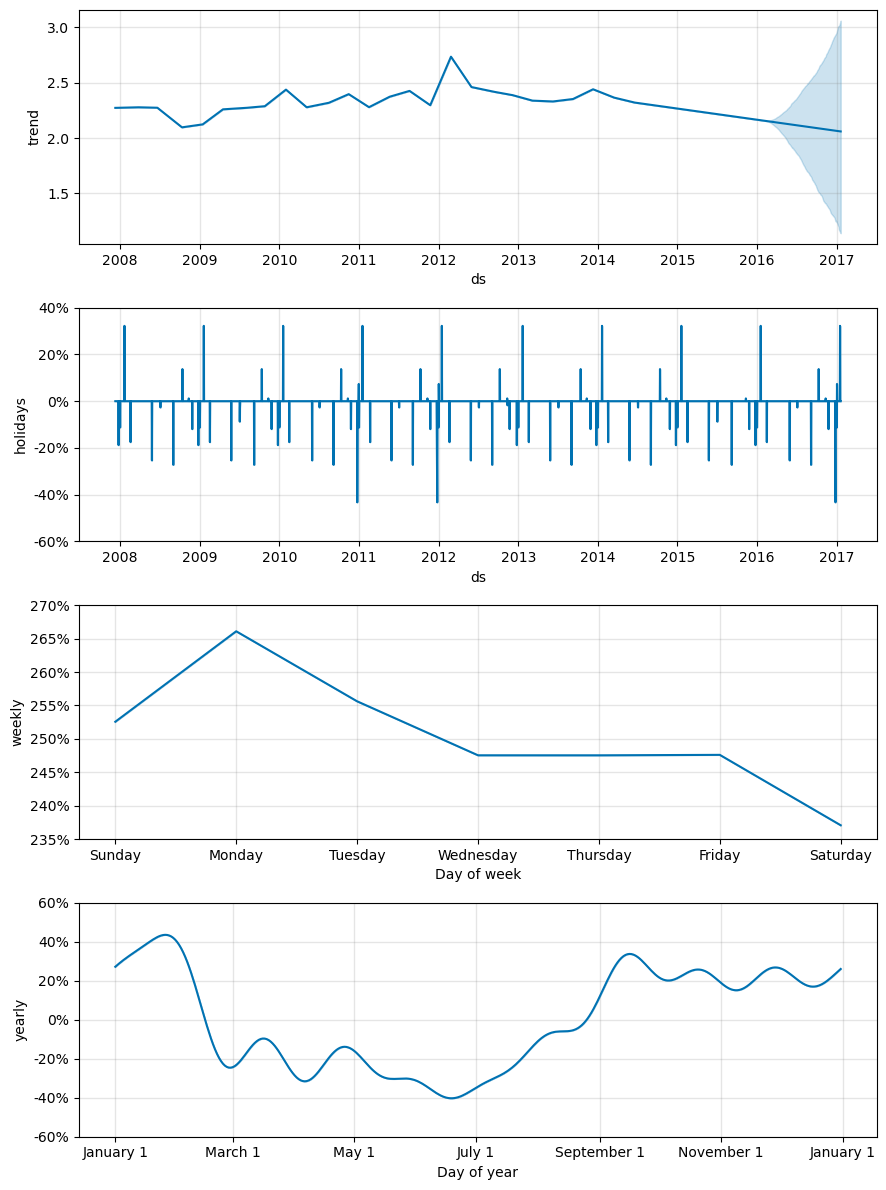

In [24]:
pro = Prophet(
    changepoint_prior_scale=0.5,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

18:34:08 - cmdstanpy - INFO - Chain [1] start processing
18:34:10 - cmdstanpy - INFO - Chain [1] done processing


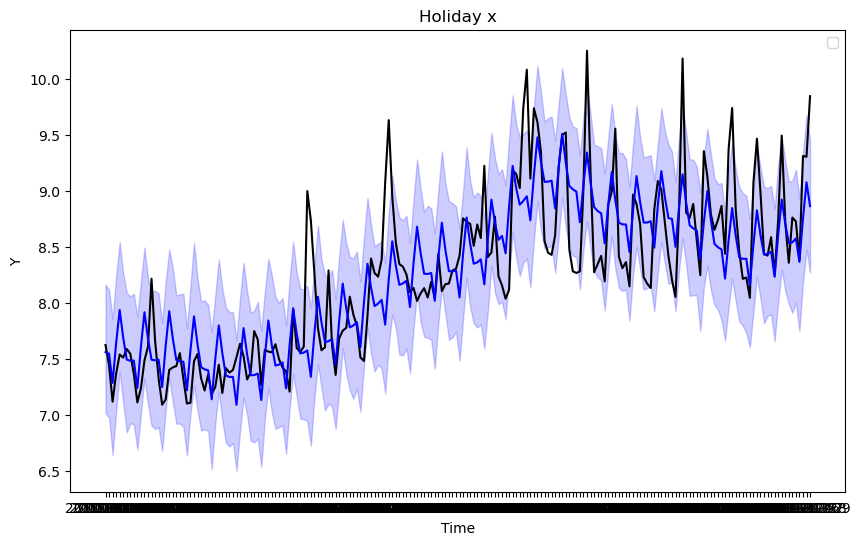

In [25]:
pro = Prophet(
    changepoint_prior_scale=0.5,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday x')
plt.legend()
plt.show()

18:34:54 - cmdstanpy - INFO - Chain [1] start processing
18:34:57 - cmdstanpy - INFO - Chain [1] done processing


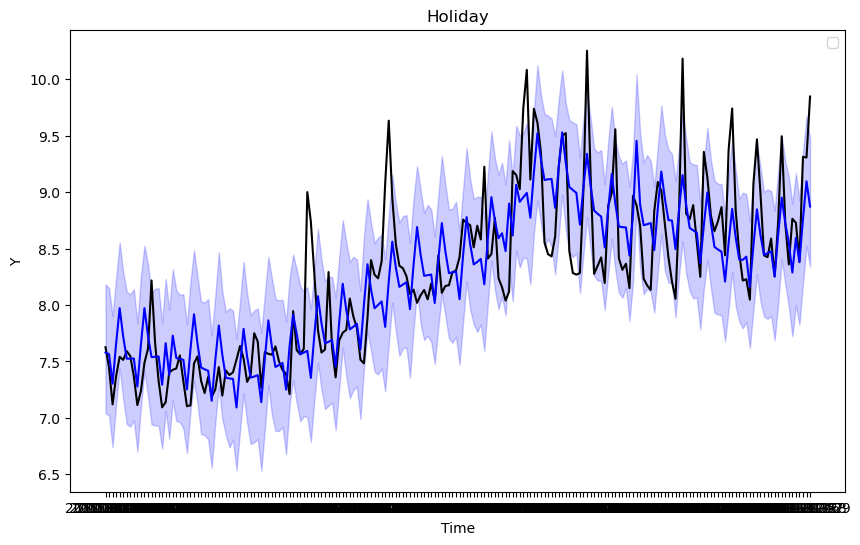

In [26]:
pro = Prophet(
    changepoint_prior_scale=0.5,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday')
plt.legend()
plt.show()

## 예제 11-2. 세 가지 모델 예측 비교 예시

### 방한 외국인 수 데이터 예측 그래프

#### 필요한 패키지 불러오기

In [30]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 데이터 전처리

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.4/data/kor_visit.csv', header=None)
df = df.T
kor = pd.DataFrame()
kor['y'] = df[2][1:181].str.replace(',', '').astype(int)
kor['ds'] = pd.date_range(start='1-1-2005', periods=180, freq='ME')
kor

,y,ds
1,458321,2005-01-31
2,477706,2005-02-28
3,532397,2005-03-31
4,497955,2005-04-30
5,475348,2005-05-31
...,...,...
176,1586299,2019-08-31
177,1459664,2019-09-30
178,1656195,2019-10-31
179,1456429,2019-11-30


#### Prophet 예측

In [44]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='multiplicative',
    yearly_seasonality=5,
    daily_seasonality=False
)
pro.fit(kor.iloc[:-12])

future = pro.make_future_dataframe(periods=12, freq='ME')
forecast = pro.predict(future)
result_pro = forecast[forecast['ds']>='2019-01-01']

19:52:10 - cmdstanpy - INFO - Chain [1] start processing
19:52:10 - cmdstanpy - INFO - Chain [1] done processing


#### ETS 예측

In [24]:
kor_series = kor.iloc[:-12,0]
kor_series.index = kor.iloc[:-12,1]
fit_cem = ETSModel(kor_series, trend='add', seasonal='add').fit()
forecast_cem = fit_cem.forecast(12)

#### ARIMA 예측

In [52]:
model = auto_arima(kor_series, seasonal=True, m=12, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)
predictions = model.predict(n_periods=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4324.180, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4360.666, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4340.206, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4349.131, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4359.028, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4343.847, Time=0.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4336.076, Time=0.14 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=4322.757, Time=0.48 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4323.239, Time=0.38 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=4323.753, Time=0.65 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=4323.524, Time=0.48 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=4328.020, Time=0.36 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=4317.709, Time=0.45 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=4321.372, Time=0.13 sec
 ARIMA(2,1,1)(2,0,0

#### 시각화

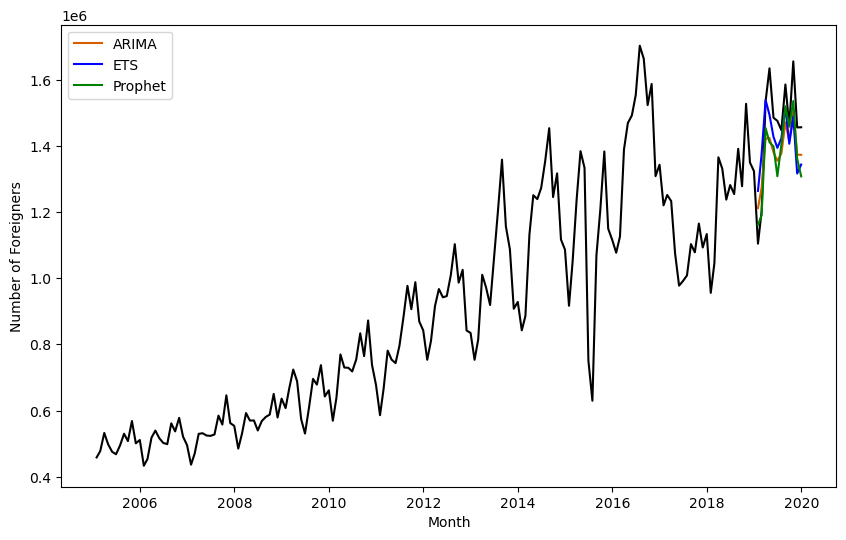

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(kor['ds'], kor['y'], color='black')
plt.plot(predictions, label='ARIMA', color='#D55E00')
plt.plot(forecast_cem, label='ETS', color='b')
plt.plot(result_pro['ds'], result_pro['yhat'], label='Prophet', color='green')
plt.xlabel('Month')
plt.ylabel('Number of Foreigners')
plt.legend()
plt.show()

#### 평가

In [55]:
ans = kor[kor['ds'] >= '2019-01-01']

print(f"ARIMA) MSE: {mean_squared_error(ans['y'], predictions.values)} MAE: {mean_absolute_error(ans['y'], predictions.values)} MAPE: {mean_absolute_percentage_error(ans['y'], predictions.values)}")
print(f"ETS) MSE: {mean_squared_error(ans['y'], forecast_cem.values)} MAE: {mean_absolute_error(ans['y'], forecast_cem.values)} MAPE: {mean_absolute_percentage_error(ans['y'], forecast_cem.values)}")
print(f"Prophet) MSE: {mean_squared_error(ans['y'], result_pro['yhat'])} MAE: {mean_absolute_error(ans['y'], result_pro['yhat'])} MAPE: {mean_absolute_percentage_error(ans['y'], result_pro['yhat'])}")

ARIMA) MSE: 13074806118.358953 MAE: 106505.6204835744 MAPE: 0.0725160994355455
ETS) MSE: 12778260343.75888 MAE: 98439.84829225649 MAPE: 0.07011351074515107
Prophet) MSE: 12241998311.576195 MAE: 91554.0762314644 MAPE: 0.06105213705889891
